NN

From

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [1]:
#!pip install torch
#!pip install torchvision

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

In [5]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [7]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [14]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [15]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [19]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [20]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [21]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302907  [   64/60000]
loss: 2.293895  [ 6464/60000]
loss: 2.281152  [12864/60000]
loss: 2.271620  [19264/60000]
loss: 2.250087  [25664/60000]
loss: 2.239671  [32064/60000]
loss: 2.235780  [38464/60000]
loss: 2.221288  [44864/60000]
loss: 2.210670  [51264/60000]
loss: 2.174897  [57664/60000]
Test Error: 
 Accuracy: 52.3%, Avg loss: 2.174053 

Epoch 2
-------------------------------
loss: 2.185114  [   64/60000]
loss: 2.178240  [ 6464/60000]
loss: 2.131913  [12864/60000]
loss: 2.140440  [19264/60000]
loss: 2.089339  [25664/60000]
loss: 2.043410  [32064/60000]
loss: 2.066991  [38464/60000]
loss: 2.008302  [44864/60000]
loss: 2.006075  [51264/60000]
loss: 1.931219  [57664/60000]
Test Error: 
 Accuracy: 57.8%, Avg loss: 1.932657 

Epoch 3
-------------------------------
loss: 1.959990  [   64/60000]
loss: 1.941399  [ 6464/60000]
loss: 1.836427  [12864/60000]
loss: 1.867831  [19264/60000]
loss: 1.753415  [25664/60000]
loss: 1.699770  [32064/600

In [23]:
torch.save(model.state_dict(), r"C:\Users\HP\OneDrive - Teesside University\Uni\CNN\Save\CNNmodel.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [24]:
model = NeuralNetwork()
model.load_state_dict(torch.load(r"C:\Users\HP\OneDrive - Teesside University\Uni\CNN\Save\CNNmodel.pth"))

<All keys matched successfully>

In [25]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [57]:
model.eval()
x, y = test_data[90][0], test_data[91][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Sneaker", Actual: "Dress"


In [55]:
from matplotlib import pyplot as plt
a = test_data[91][0].reshape(28,28)
a.shape

torch.Size([28, 28])

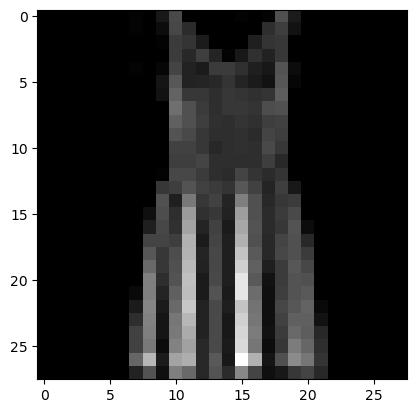

In [56]:
# Plot the data using imshow with gray colormap
plt.imshow(a, cmap='gray')

# Display the plot
plt.show()

In [58]:
test_data[91][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118,
          0.0000, 0.0941, 0.2902, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118,
          0.0000, 0.0118, 0.3137, 0.1059, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118,
          0.0000, 0.0471, 0.2784, 0.1686, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.1804, 0.2431, 0.0706, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0118, 0.2314, 0.2039, 0.1059, 0.0000, 0.0000, 0.0000,
          0.1216, 0.2039, 0.2157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.2314, 0.1569, 0.2431, 0.1451, 0.0118, 0.0941,
          0.1922, 0.1333, 0.2157, 0.0000, 0.0000, 0.0000,